In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/7. gurgaon_outliers_removed.csv', on_bad_lines = 'skip')

df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,City Shri Ram Apartments,sector 110,0.22,3666,5400,Super Built up area 600(55.74 sq.m.),2,1,1,...,600.0,NaN,NaN,0,0,0,0,0,1,0
1,house,Central Park Flower Valley,sector 33,1.15,9349,1732,Plot area 1737(161.37 sq.m.)Built Up area: 140...,2,2,NaN,...,NaN,1400.0,1230.0,1,0,0,0,0,0,71
2,flat,Mapsko Royale Ville,sector 82,1.15,6424,1790,Super Built up area 1790(166.3 sq.m.),3,4,2,...,1790.0,NaN,NaN,0,1,0,1,0,0,104
3,flat,Ardee City,sector 52,1.50,9146,1640,Super Built up area 1640(152.36 sq.m.),4,4,3,...,1640.0,NaN,NaN,0,0,0,0,0,1,65
4,flat,Green Court,sector 90,0.45,7188,5634,Carpet area: 626 (58.16 sq.m.),2,2,1,...,NaN,NaN,626.0,0,0,0,0,0,0,42


In [7]:
df.select_dtypes(include = 'number').corr()['price_in_cr'][1:].sort_values(ascending = False)


,price_in_cr
price_per_sqft,0.784708
super_built_up_area,0.774742
built_up_area,0.709082
carpet_area,0.570303
bedroom,0.512149
servant room,0.406057
pooja room,0.326997
store room,0.310045
study room,0.252269
bathroom,0.158228


In [8]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
area_in_sqft,0
areawithtype,0
bedroom,0
bathroom,0
balcony,813


# balcony

In [9]:
df['balcony'].unique()

array(['1', nan, '2', '3', '3+', '0'], dtype=object)

In [10]:
df['balcony'].value_counts()

,count
balcony,
3,936
3+,829
2,698
1,285
0,87


In [11]:
np.round(df.groupby('balcony')['area_in_sqft'].median()).sort_values()

,area_in_sqft
balcony,
2,1727.0
3,1819.0
3+,2149.0
0,2250.0
1,4680.0


In [12]:
np.round(df.groupby('balcony')['area_in_sqft'].mean()).sort_values()

,area_in_sqft
balcony,
3,2243.0
3+,2348.0
2,2789.0
0,3177.0
1,4444.0


In [13]:
df[df['balcony'].isnull()]['area_in_sqft'].mean()

3485.6740467404675

In [14]:
def filling_balcony(x):

   if (0 <= x['area_in_sqft'] & x['area_in_sqft'] <= 2243):
      return '3'

   elif (2244 <= x['area_in_sqft'] & x['area_in_sqft'] <= 2348):
      return '3+'

   elif (2349 <= x['area_in_sqft'] & x['area_in_sqft'] <= 2789):
      return '2'

   elif (2788 <= x['area_in_sqft'] & x['area_in_sqft'] <= 3177):
      return '0'

   elif (x['area_in_sqft']  >= 3178):
      return '1'

In [15]:
indexes = df[df['balcony'].isnull()].index

df.loc[indexes,'balcony'] = df.loc[indexes].apply(filling_balcony, axis = 1)


In [16]:
df['balcony'].value_counts()

,count
balcony,
3,1216
3+,847
2,806
1,659
0,120


In [17]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
area_in_sqft,0
areawithtype,0
bedroom,0
bathroom,0
balcony,0


In [18]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
area_in_sqft,0
areawithtype,0
bedroom,0
bathroom,0
balcony,0


# 2. built_up_area

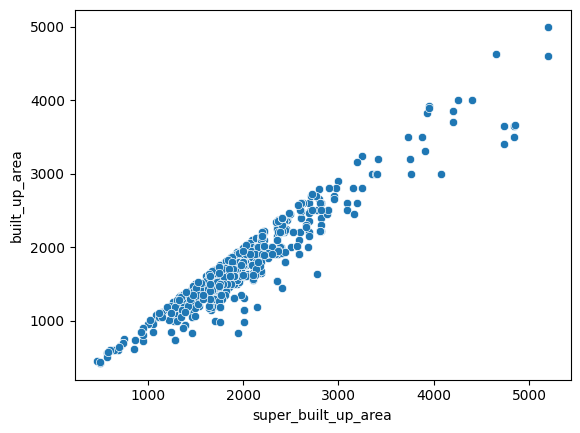

In [19]:
sns.scatterplot(x = df['super_built_up_area'], y = df['built_up_area'])
plt.show()

# Strong Linear Relationship

In [20]:
px.scatter(df, x = 'carpet_area', y = 'built_up_area')

In [21]:
i = df[(df['carpet_area']>9800) & (df['built_up_area']<600)].index

df.loc[i,'built_up_area'] = 10000

indexes = df[df['built_up_area'] / df['carpet_area'] > 2].index

df.loc[indexes,'carpet_area'] = df.loc[indexes,'carpet_area']*9

df.drop(index = 909, inplace = True)
df.loc[3157,'built_up_area'] = 190*9
df.loc[1487,'carpet_area'] = 1100

df.drop(index = df[df['built_up_area'] < df['carpet_area']].index, inplace = True)


In [22]:
df['area_in_sqft'] = np.round((df['price_in_cr'] * 10**7)/df['price_per_sqft'])


In [23]:
px.scatter(df, x = 'carpet_area', y = 'built_up_area')

In [24]:
# df.head(20)[['property_type','society','price_in_cr','area_in_sqft','areawithtype','super_built_up_area','built_up_area','carpet_area']]

# indexes = df[df['built_up_area']<500][['property_type','society','price_in_cr','area_in_sqft','areawithtype','super_built_up_area','built_up_area','carpet_area']].index

# df.loc[indexes,'built_up_area'] = np.round(df.loc[indexes,'area_in_sqft'])



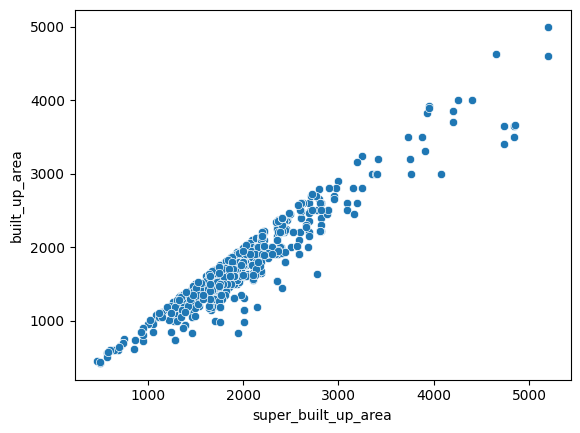

In [25]:
sns.scatterplot(x = df['super_built_up_area'], y = df['built_up_area'])
plt.show()


In [26]:
px.scatter(df, x = 'carpet_area', y = 'built_up_area')

In [27]:
df.shape

(3645, 23)

In [28]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
area_in_sqft,0
areawithtype,0
bedroom,0
bathroom,0
balcony,0


In [29]:
df[df['built_up_area'].isnull() & df['super_built_up_area'].isnull() & df['carpet_area'].isnull()]

# No Rows


,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [30]:
all_present_df = df[(df['built_up_area'].notnull() & df['super_built_up_area'].notnull() & df['carpet_area'].notnull())]

print(all_present_df.shape)

all_present_df.head(2)[['areawithtype','super_built_up_area','built_up_area','carpet_area']]


(534, 23)


,areawithtype,super_built_up_area,built_up_area,carpet_area
11,Super Built up area 1239(115.11 sq.m.)Built Up...,1239.0,1115.0,947.0
13,Super Built up area 2070(192.31 sq.m.)Built Up...,2070.0,2060.0,1760.0


In [31]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

print(super_to_built_up_ratio, carpet_to_built_up_ratio)


1.1052289815447711 0.9063185607722686


In [32]:
# both super_built_up_area and carpet_area present

sbca_df = df[df['super_built_up_area'].notnull() & (df['built_up_area'].isnull() &  df['carpet_area'].notnull())]

sbca_df.head(2)


,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
7,flat,Emaar Palm Gardens,sector 83,1.80,9473,1900.0,Super Built up area 1900(176.52 sq.m.)Carpet a...,3,1,3,...,1900.0,NaN,1244.0,1,1,1,1,0,0,174
8,flat,SS Residency Residency Almeria,sector 84,1.48,7400,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,3,2,...,2000.0,NaN,1294.0,0,1,1,0,0,0,139


In [33]:
sbca_df['built_up_area'].fillna(round(((sbca_df['super_built_up_area']/1.105) + (sbca_df['carpet_area']/0.906)) /2), inplace = True)


In [34]:
df.update(sbca_df)

In [35]:
# super_built_up_area is present

sb_df = df[df['super_built_up_area'].notnull() & (df['built_up_area'].isnull() &  df['carpet_area'].isnull())]

sb_df.shape


(879, 23)

In [36]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace = True)


In [37]:
df.update(sb_df)

In [38]:
car_area_df = df[df['super_built_up_area'].isnull() & (df['built_up_area'].isnull() &  df['carpet_area'].notnull())]

car_area_df.shape


(668, 23)

In [39]:
car_area_df['built_up_area'].fillna(round(car_area_df['carpet_area']/0.906), inplace = True)


In [40]:
df.update(car_area_df)

In [41]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
area_in_sqft,0
areawithtype,0
bedroom,0
bathroom,0
balcony,0


In [42]:
df.select_dtypes(include = 'number').corr()['price_in_cr'][1:].sort_values(ascending = False)


,price_in_cr
price_per_sqft,0.785015
super_built_up_area,0.774742
built_up_area,0.714182
carpet_area,0.700087
area_in_sqft,0.601583
bedroom,0.512481
servant room,0.405964
pooja room,0.327044
store room,0.310045
study room,0.252110


In [43]:
px.scatter(df, x = 'built_up_area', y = 'price_in_cr')

In [44]:
anomaly_df = df[(df['price_in_cr']<15) & (df['built_up_area'] <=700)]

anomaly_df['built_up_area'] = anomaly_df['area_in_sqft']

In [45]:
df.update(anomaly_df)

In [46]:
px.scatter(df, x = 'built_up_area', y = 'price_in_cr')

In [47]:
df[(df['price_in_cr'] == 2.25) & (df['built_up_area'] == 8236)]

,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2462,house,Independent,sector 46,2.25,2732,8236.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq...,4,3,1,...,NaN,8236.0,85.0,1,0,0,0,0,0,35


In [48]:
mean = df[(8000 <= df['built_up_area']) & (df['built_up_area'] <=8500)]['price_in_cr'].mean()
mean


8.5875

In [49]:
df.loc[2462,'price_in_cr'] = mean

In [50]:
df.loc[2462]['price_in_cr']

8.5875

In [51]:
px.scatter(df, x = 'built_up_area', y = 'price_in_cr')

In [52]:
mask1 = df[(18 < df['price_in_cr']) & (df['price_in_cr']<21) & (9000 <= df['built_up_area']) & (df['built_up_area'] <= 9020) ]

# justified


In [53]:
mask1 = df[(6 <= df['price_in_cr']) & (df['price_in_cr']<= 31.5) & (7000 <= df['built_up_area']) & (df['built_up_area'] <=12000) ]


In [54]:
df.loc[110,'price_in_cr'] = 19

In [55]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [56]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sqft',
       'area_in_sqft', 'areawithtype', 'bedroom', 'bathroom', 'balcony',
       'floornum', 'facing', 'agepossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [57]:
df.drop(columns = ['area_in_sqft','areawithtype', 'super_built_up_area', 'carpet_area'], inplace = True)


In [58]:
df['built_up_area'] = df['built_up_area'].astype(int)

In [59]:
df = df.sample(df.shape[0], random_state = 13, ignore_index = True)

In [60]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,floornum,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,Shree Vardhman Victoria,sector 70,1.78,9128,3,3,3+,7,north-east,Relatively New,1765,0,1,0,0,1,1,49
1,flat,Mapsko Mount Ville,sector 79,1.30,8724,3,3,3,19,east,Relatively New,1176,0,0,1,0,0,0,102
2,house,Bhim Nagar Society,sector 6,0.40,2500,4,2,3,1,east,Undefined,1600,0,0,0,0,0,1,0
3,house,Madan Puri,sector 7,0.75,12500,3,2,1,3,south-east,Moderately Old,600,0,0,0,0,0,1,0
4,flat,DLF The Icon,sector 43,5.25,20388,4,4,3,9,north,Old,2570,0,1,0,1,1,1,135


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3645 entries, 0 to 3644
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3645 non-null   object 
 1   society          3645 non-null   object 
 2   sector           3645 non-null   object 
 3   price_in_cr      3645 non-null   float64
 4   price_per_sqft   3645 non-null   int64  
 5   bedroom          3645 non-null   int64  
 6   bathroom         3645 non-null   int64  
 7   balcony          3645 non-null   object 
 8   floornum         3645 non-null   int64  
 9   facing           3645 non-null   object 
 10  agepossession    3645 non-null   object 
 11  built_up_area    3645 non-null   int64  
 12  study room       3645 non-null   int64  
 13  servant room     3645 non-null   int64  
 14  store room       3645 non-null   int64  
 15  pooja room       3645 non-null   int64  
 16  others           3645 non-null   int64  
 17  furnishing_typ

In [62]:
df['property_type'].value_counts()

,count
property_type,
flat,2826
house,819


In [63]:
# df['society'].value_counts() # no unlikely value

# Facing

In [64]:
df['facing'].value_counts()

,count
facing,
na,1041
east,625
north-east,622
north,378
west,242
south,229
north-west,187
south-east,173
south-west,148


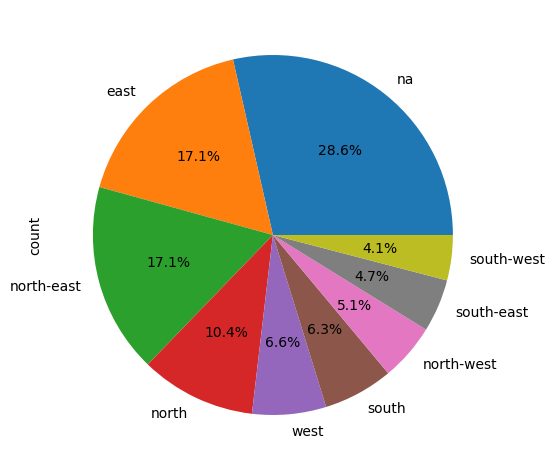

In [65]:
df['facing'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.tight_layout()
plt.show()

In [66]:
df[df['facing'] == 'na']['property_type'].value_counts()

,count
property_type,
flat,793
house,248


In [67]:
df[(df['property_type'] == 'flat') & (df['facing']!= 'na')]['facing'].value_counts()


,count
facing,
north-east,482
east,466
north,284
south,201
west,178
north-west,151
south-east,142
south-west,129


In [68]:
df[(df['property_type'] == 'house') & (df['facing']!= 'na') & (df['society'] == 'Independent')]['facing'].value_counts()


,count
facing,
east,80
north-east,72
north,51
west,34
north-west,24
south-east,20
south,19
south-west,14


In [69]:
df[(df['property_type'] == 'house') & (df['facing']!= 'na') & (df['society'] != 'Independent')]['facing'].value_counts()


,count
facing,
east,79
north-east,68
north,43
west,30
north-west,12
south-east,11
south,9
south-west,5


In [70]:
def fill_facing(x):

    if x['property_type'] == 'flat':
       return 'north-east'
    else :
      return 'east'

facing_null_df = df[df['facing'] == 'na']

facing_null_df['facing'] = facing_null_df.apply(fill_facing, axis = 1)

In [71]:
facing_null_df['facing'].value_counts()

,count
facing,
north-east,793
east,248


In [72]:
df.update(facing_null_df)

In [73]:
df['facing'].value_counts()

,count
facing,
north-east,1415
east,873
north,378
west,242
south,229
north-west,187
south-east,173
south-west,148


In [74]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,floornum,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,Shree Vardhman Victoria,sector 70,1.78,9128,3,3,3+,7,north-east,Relatively New,1765,0,1,0,0,1,1,49
1,flat,Mapsko Mount Ville,sector 79,1.30,8724,3,3,3,19,east,Relatively New,1176,0,0,1,0,0,0,102
2,house,Bhim Nagar Society,sector 6,0.40,2500,4,2,3,1,east,Undefined,1600,0,0,0,0,0,1,0
3,house,Madan Puri,sector 7,0.75,12500,3,2,1,3,south-east,Moderately Old,600,0,0,0,0,0,1,0
4,flat,DLF The Icon,sector 43,5.25,20388,4,4,3,9,north,Old,2570,0,1,0,1,1,1,135


# agepossession

In [75]:
df['agepossession'].value_counts()

,count
agepossession,
Relatively New,1630
New Property,718
Moderately Old,559
Undefined,394
Old,302
Under Construction,42


In [76]:
def mode_based_imputation(row):

    if row['agepossession'] == 'Undefined':

        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agepossession'].mode()

        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agepossession']


In [77]:
df['agepossession'] = df.apply(mode_based_imputation, axis=1)

In [78]:
df['agepossession'].value_counts()

,count
agepossession,
Relatively New,1790
New Property,815
Moderately Old,602
Old,337
Undefined,59
Under Construction,42


In [79]:
def mode_based_imputation2(row):

    if row['agepossession'] == 'Undefined':

        mode_value = df[(df['sector'] == row['sector'])]['agepossession'].mode()

        # If mode_value is empty (no mode found), return NaN, otherwise return the mode

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agepossession']


In [80]:
df['agepossession'] = df.apply(mode_based_imputation2, axis=1)

In [81]:
df['agepossession'].value_counts()

,count
agepossession,
Relatively New,1808
New Property,816
Moderately Old,606
Old,340
Under Construction,42
Undefined,33


In [82]:
def mode_based_imputation3(row):

    if row['agepossession'] == 'Undefined':

        mode_value = df[(df['property_type'] == row['property_type'])]['agepossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agepossession']


In [83]:
df['agepossession'] = df.apply(mode_based_imputation3, axis=1)

In [84]:
df['agepossession'].value_counts()

,count
agepossession,
Relatively New,1811
New Property,816
Moderately Old,636
Old,340
Under Construction,42


In [85]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
bedroom,0
bathroom,0
balcony,0
floornum,0
facing,0


In [86]:
df['furnishing_type'].unique()

df['furnishing_type'] = df['furnishing_type'].astype(object)

df['furnishing_type'] = df['furnishing_type'].replace({0: 'Un-furnished', 1: 'Semi-furnished', 2: 'Furnished'})


In [87]:
df['furnishing_type'].unique()

array(['Semi-furnished', 'Un-furnished', 'Furnished'], dtype=object)

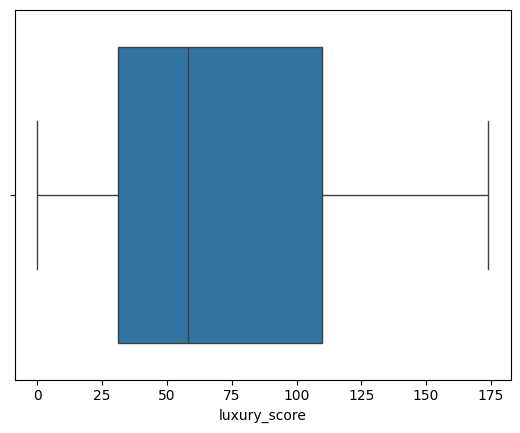

In [88]:
sns.boxplot(x = df['luxury_score'])
plt.show()

In [89]:
df['luxury_score'].describe()

,luxury_score
count,3645.000000
mean,71.211523
std,53.346551
min,0.000000
25%,31.000000
50%,58.000000
75%,110.000000
max,174.000000


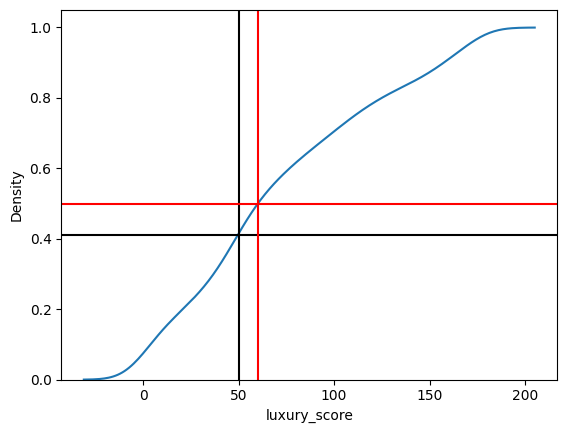

In [90]:
sns.kdeplot(x = df['luxury_score'], cumulative = True)

plt.axhline(0.41, color = 'black')
plt.axvline(50, color = 'black')

plt.axhline(0.5, color = 'red')
plt.axvline(60, color = 'red')
plt.show()

In [91]:
def binning_luxury_score(x):
    if 0 <= x <=30:
        return 'Low'
    elif 31 <= x <= 57:
        return 'Average'
    elif 58 <= x < 150:
        return 'Medium'
    elif 150 <= x <= 175:
        return 'High'
    else:
        return None

In [92]:
df['luxury_category'] = df['luxury_score'].apply(binning_luxury_score)

In [93]:
df['floornum'].describe()

,floornum
count,3645.000000
mean,6.811523
std,6.053809
min,-1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


In [94]:
def categorize_floor(floor):

    if -1 <= floor <= 0:
        return "Basement/Ground Floor"
    elif 1 <= floor <= 3:
        return "Low-rise"
    elif 4 <= floor <= 9:
        return "Mid-rise"
    elif 10 <= floor <= 20:
        return "High-rise"
    elif floor >= 21:
        return "Skyscraper"
    else:
        return None

In [95]:
df['floor_category'] = df['floornum'].apply(categorize_floor)

In [96]:
df.drop(columns=['floornum','luxury_score'],inplace=True)

In [97]:
df.shape

(3645, 19)

In [98]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Shree Vardhman Victoria,sector 70,1.78,9128,3,3,3+,north-east,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Mapsko Mount Ville,sector 79,1.30,8724,3,3,3,east,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Bhim Nagar Society,sector 6,0.40,2500,4,2,3,east,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Madan Puri,sector 7,0.75,12500,3,2,1,south-east,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,DLF The Icon,sector 43,5.25,20388,4,4,3,north,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


In [99]:
df.drop(index = df[df['sector'].isin(['rajiv chowk', 'nars', ', delhi ncr'])].index , inplace = True)

df['sector'] = df['sector'].str.title().str.strip()

df['sector'] = df['sector'].str.replace('Sohna Road  Road', 'Sohna Road', regex = True)

In [100]:
df['sector'] = df['sector'].str.title().str.strip()

In [101]:
df['sector'] = df['sector'].str.replace('Sohna Road  Road', 'Sohna Road', regex = True)

In [102]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price_in_cr,0
price_per_sqft,0
bedroom,0
bathroom,0
balcony,0
facing,0
agepossession,0


In [103]:
df['agepossession'].unique()

array(['Relatively New', 'Old', 'Moderately Old', 'New Property',
       'Under Construction'], dtype=object)

In [104]:
df['furnishing_type'].unique()

array(['Semi-furnished', 'Un-furnished', 'Furnished'], dtype=object)

In [105]:
df['luxury_category'].unique()

array(['Average', 'Medium', 'Low', 'High'], dtype=object)

In [106]:
df['floor_category'].unique()

array(['Mid-rise', 'High-rise', 'Low-rise', 'Skyscraper',
       'Basement/Ground Floor'], dtype=object)

In [107]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,Shree Vardhman Victoria,Sector 70,1.78,9128,3,3,3+,north-east,Relatively New,1765,0,1,0,0,1,Semi-furnished,Average,Mid-rise
1,flat,Mapsko Mount Ville,Sector 79,1.30,8724,3,3,3,east,Relatively New,1176,0,0,1,0,0,Un-furnished,Medium,High-rise
2,house,Bhim Nagar Society,Sector 6,0.40,2500,4,2,3,east,Old,1600,0,0,0,0,0,Semi-furnished,Low,Low-rise
3,house,Madan Puri,Sector 7,0.75,12500,3,2,1,south-east,Moderately Old,600,0,0,0,0,0,Semi-furnished,Low,Low-rise
4,flat,DLF The Icon,Sector 43,5.25,20388,4,4,3,north,Old,2570,0,1,0,1,1,Semi-furnished,Medium,Mid-rise


In [109]:
df[df['built_up_area'] == df['built_up_area'].min()]

,property_type,society,sector,price_in_cr,price_per_sqft,bedroom,bathroom,balcony,facing,agepossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
414,house,Independent,Sector 17,0.32,22068,2,2,3,east,Moderately Old,145,0,0,0,0,0,Semi-furnished,Low,Low-rise


In [108]:
# df.to_csv('gurgaon_missing_values_removed.csv', index = False)